This Porject is about <strong>Lionel Andrés Messi Cuccitini</strong> the greatest player of all times 
Will be discussing:

- His Goals all the stats about it 
- His assists 
- Some deep stats about the importance about his goals 
- Apperances in big games 
- And some other important stats

##### Moving on to the code itself:

- Clean the data from any (Missing Values, Duplicated Values)
- Some Vizulization to make It easier to Know his stats 

##### After we do some coding here we will be moving On to Tableau to provide an Interactive dashboard 

## Importing the main libraries 

In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns

## Import and exploriation

In [2]:
#loading the dataset
filepath= os.path.join(os.getcwd(),'data.csv')
df=pd.read_csv(filepath)

In [3]:
#Getting first 5 values
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04-May,LaLiga,34,05/01/2005,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05-Jun,UEFA Champions League,Group Stage,11/02/2005,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05-Jun,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05-Jun,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05-Jun,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho


In [4]:
#More insights 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            704 non-null    object
 1   Competition       704 non-null    object
 2   Matchday          704 non-null    object
 3   Date              704 non-null    object
 4   Venue             704 non-null    object
 5   Club              704 non-null    object
 6   Opponent          704 non-null    object
 7   Result            704 non-null    object
 8   Playing_Position  704 non-null    object
 9   Minute            704 non-null    object
 10  At_score          704 non-null    object
 11  Type              703 non-null    object
 12  Goal_assist       490 non-null    object
dtypes: object(13)
memory usage: 71.6+ KB


In [5]:
df.describe()
#Nothing useful here 

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,704,704,704,704,704,704,704,704,704,704,704,703,490
unique,19,10,48,455,2,2,98,48,9,97,38,12,71
top,11-Dec,LaLiga,Group Stage,03/07/2012,H,FC Barcelona,Sevilla FC,4:00,CF,55,1:00,Left-footed shot,Luis Suarez
freq,73,474,80,5,420,672,38,47,276,14,101,436,48


In [6]:
# Knowing who assisted him the most 
# Get the value counts of the 'Opponent' column
goal_counts = df["Opponent"].value_counts()

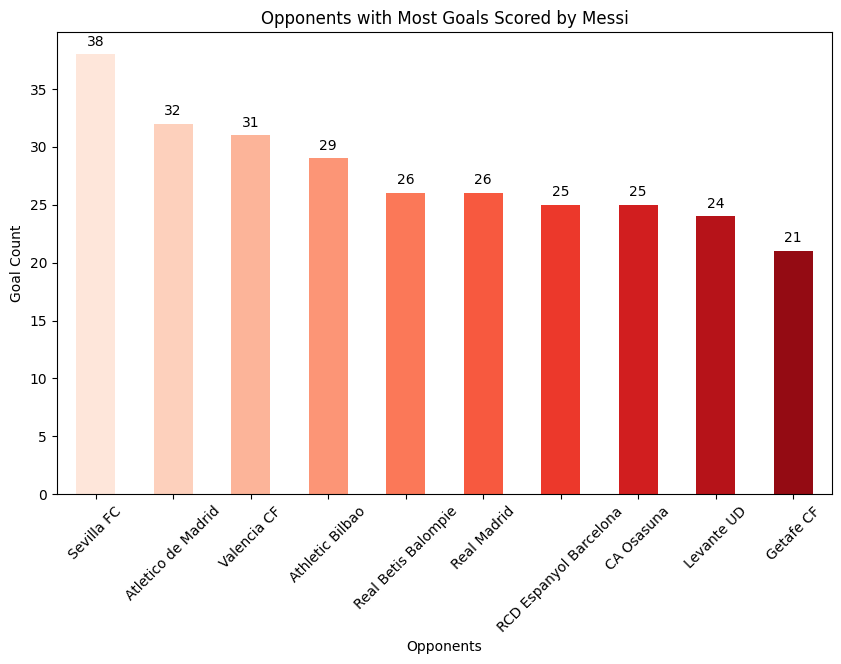

In [7]:
# Extract the top 10 opponents against whom Messi has scored the most goals
top_10_goals = goal_counts.head(10)

# Generate a color palette based on the number of bars
num_bars = len(top_10_goals)
colors = sns.color_palette('Reds', num_bars)

# Plotting the bar chart with auto-generated colors
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get the current axes
top_10_goals.plot(kind='bar', color=colors, ax=ax)
plt.title('Opponents with Most Goals Scored by Messi')
plt.xlabel('Opponents')
plt.ylabel('Goal Count')
plt.xticks(rotation=45)

# Annotate the values on top of the bars
for i, v in enumerate(top_10_goals):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.show()

<strong> Luis Suarez is the most player assisted Leo Messi <strong>

In [8]:
df.isna().sum()
#Knowing it's football so sometimes when no One assist that means he probably did it without an assist 
#But Type with Null value? That's strange
#Let's invisitate more

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position      0
Minute                0
At_score              0
Type                  1
Goal_assist         214
dtype: int64

<strong> Sevilla FC <strong> is the most with 38 Goal. Wow!

In [9]:
# Condition: Rows where Opponent is "Sevilla"
condition = df['Opponent'] == 'Sevilla FC'

# Filter the "Season" column based on the condition
seasons_against_sevilla = df.loc[condition, 'Season'].values.tolist()

# View the resulting values in the "Season" column
print(seasons_against_sevilla)

#Hmmmmm weird format, Let's explore the Season column

['06-Jul', '07-Aug', '07-Aug', '08-Sep', '08-Sep', '09-Oct', '09-Oct', '09-Oct', '10-Nov', '10-Nov', '10-Nov', '10-Nov', '10-Nov', '11-Dec', 'Dec-13', '13/14', '13/14', '13/14', '14/15', '14/15', '14/15', '14/15', '15/16', '15/16', '15/16', '16/17', '16/17', '16/17', '16/17', '17/18', '17/18', '18/19', '18/19', '18/19', '18/19', '18/19', '19/20', '20/21']


##### Hmmmmm weird format, Let's explore the Season column

In [10]:
# Access and display all the values of a column
column_values = df['Season']
print(column_values)

0      04-May
1      05-Jun
2      05-Jun
3      05-Jun
4      05-Jun
        ...  
699     22/23
700     22/23
701     22/23
702     22/23
703     22/23
Name: Season, Length: 704, dtype: object


In [11]:
df['Season'].value_counts()

11-Dec    73
Dec-13    60
14/15     58
16/17     54
10-Nov    53
18/19     51
09-Oct    47
17/18     45
13/14     41
15/16     41
20/21     38
08-Sep    38
19/20     31
22/23     18
06-Jul    17
07-Aug    16
21/22     14
05-Jun     8
04-May     1
Name: Season, dtype: int64

In [12]:
#Splitting the column to Mainten the problem
df[['BSeason', 'ESeason']] = df['Season'].str.split('/|-', 1, expand=True)

C:\Users\Tariq\AppData\Local\Temp\ipykernel_6792\870525989.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['BSeason', 'ESeason']] = df['Season'].str.split('/|-', 1, expand=True)


In [13]:
df

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,BSeason,ESeason
0,04-May,LaLiga,34,05/01/2005,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho,04,May
1,05-Jun,UEFA Champions League,Group Stage,11/02/2005,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN,05,Jun
2,05-Jun,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo,05,Jun
3,05-Jun,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel,05,Jun
4,05-Jun,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho,05,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,22/23,Ligue 1,21,02/01/2023,A,Paris Saint-Germain,Montpellier HSC,1:03,SS,72,0:02,Left-footed shot,Fabián Ruiz,22,23
700,22/23,Ligue 1,22,02/04/2023,H,Paris Saint-Germain,FC Toulouse,2:01,SS,58,2:01,Left-footed shot,Achraf Hakimi,22,23
701,22/23,Ligue 1,24,2/19/23,H,Paris Saint-Germain,LOSC Lille,4:03,CF,90+5,4:03,Direct free kick,\t,22,23
702,22/23,Ligue 1,25,2/26/23,A,Paris Saint-Germain,Olympique Marseille,0:03,CF,29,0:02,Right-footed shot,Kylian Mbappé,22,23


In [14]:
# Define a mapping of month names to numbers
month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Convert the Month column to numeric values
df['ESeason'] = df['ESeason'].apply(lambda x: month_mapping.get(x, x))


In [15]:
df['ESeason'].value_counts()

12    73
13    60
15    58
17    54
11    53
19    51
10    47
18    45
14    41
16    41
21    38
9     38
20    31
23    18
7     17
8     16
22    14
6      8
5      1
Name: ESeason, dtype: int64

In [16]:
# Drop the 'Season' column
df = df.drop('Season', axis=1)

In [17]:
# Rename the 'Name' column to 'Full Name'
df = df.rename(columns={'ESeason': 'Season'})

In [18]:
df

,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,BSeason,Season
0,LaLiga,34,05/01/2005,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho,04,5
1,UEFA Champions League,Group Stage,11/02/2005,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN,05,6
2,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo,05,6
3,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel,05,6
4,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho,05,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Ligue 1,21,02/01/2023,A,Paris Saint-Germain,Montpellier HSC,1:03,SS,72,0:02,Left-footed shot,Fabián Ruiz,22,23
700,Ligue 1,22,02/04/2023,H,Paris Saint-Germain,FC Toulouse,2:01,SS,58,2:01,Left-footed shot,Achraf Hakimi,22,23
701,Ligue 1,24,2/19/23,H,Paris Saint-Germain,LOSC Lille,4:03,CF,90+5,4:03,Direct free kick,\t,22,23
702,Ligue 1,25,2/26/23,A,Paris Saint-Germain,Olympique Marseille,0:03,CF,29,0:02,Right-footed shot,Kylian Mbappé,22,23


In [19]:
# Dropping the Begin of the Season Column
df = df.drop(columns = "BSeason", axis=1)

In [20]:
df

,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Season
0,LaLiga,34,05/01/2005,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho,5
1,UEFA Champions League,Group Stage,11/02/2005,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN,6
2,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo,6
3,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel,6
4,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Ligue 1,21,02/01/2023,A,Paris Saint-Germain,Montpellier HSC,1:03,SS,72,0:02,Left-footed shot,Fabián Ruiz,23
700,Ligue 1,22,02/04/2023,H,Paris Saint-Germain,FC Toulouse,2:01,SS,58,2:01,Left-footed shot,Achraf Hakimi,23
701,Ligue 1,24,2/19/23,H,Paris Saint-Germain,LOSC Lille,4:03,CF,90+5,4:03,Direct free kick,\t,23
702,Ligue 1,25,2/26/23,A,Paris Saint-Germain,Olympique Marseille,0:03,CF,29,0:02,Right-footed shot,Kylian Mbappé,23


In [21]:
df["Season"].unique()

array([5, 6, 7, 8, 9, 10, 11, 12, '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23'], dtype=object)

In [22]:
df.columns

Index(['Competition', 'Matchday', 'Date', 'Venue', 'Club', 'Opponent',
       'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist', 'Season'],
      dtype='object')

### Goal in A single season

In [23]:
df["Season"]

0       5
1       6
2       6
3       6
4       6
       ..
699    23
700    23
701    23
702    23
703    23
Name: Season, Length: 704, dtype: object

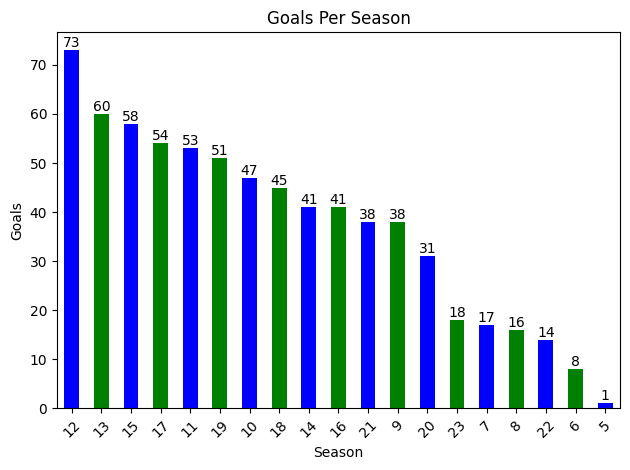

In [47]:
# Plot the value counts of Season
season_counts = df['Season'].value_counts()

# Define two colors for the bars
colors = ['blue', 'green']

# Create the bar plot
ax = season_counts.plot(kind='bar', color=colors)

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Goals')
plt.title('Goals Per Season')

# Add count values on top of each bar
for i, count in enumerate(season_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Customize the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Display the plot
plt.tight_layout()  # Adjust spacing between elements
plt.show()

#### So Leo Messi best Season is 
- 11/12 70 Goal
- 12/13 60 Goal
- 14/15 58 Goal

<strong> Messi Didn't blank a single Season in his Career <strong>

## Positions played In

In [25]:
df["Playing_Position"].unique()

array(['CF', 'RW', 'LW', 'SS', 'CF ', 'AM', 'RW ', 'AM ', 'SS '],
      dtype=object)

##### As we can see there's 3 positions is repeated and they're 
- CF
- SS
- RW


<bold> let's combine them together<bold>
   

In [26]:
# Will remove white space
df['Playing_Position'] = df['Playing_Position'].str.strip()
df["Playing_Position"].unique()

array(['CF', 'RW', 'LW', 'SS', 'AM'], dtype=object)

#### Position per Competation

In [27]:
df['Competition'].unique()

array(['LaLiga', 'UEFA Champions League', 'Copa del Rey', 'Supercopa',
       'FIFA Club World Cup', 'UEFA Super Cup', 'Ligue 1',
       'Trophée des Champions', 'Troph�e des Champions',
       'Champions League'], dtype=object)

In [28]:
# Combine 'UEFA Champions League'   And     'Champions League' in one Var 
df['Competition'] = df['Competition'].replace({'Champions League': 'UEFA Champions League'})

In [29]:
# Combine 'Trophée des Champions'   And   'Troph�e des Champions'  in one Var 
df['Competition'] = df['Competition'].replace({'Troph�e des Champions': 'Trophée des Champions'})

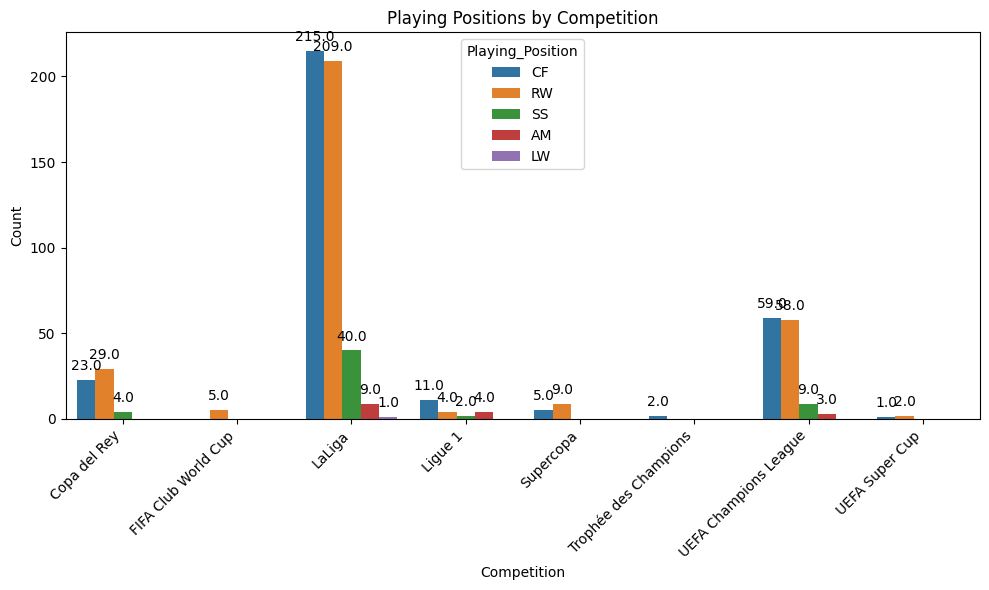

In [30]:
position_stats = df.groupby(['Competition', 'Playing_Position']).size().reset_index(name='Count')

# Create a bar chart of playing positions by competition
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Competition', y='Count', hue='Playing_Position', data=position_stats)
plt.title('Playing Positions by Competition')
plt.xlabel('Competition')
plt.ylabel('Count')

# Adjust the font size of the axis labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the chart
plt.tight_layout()
plt.show()